In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib import figure as fig

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
most_recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent

('2017-08-23',)

<Axes: xlabel='date'>

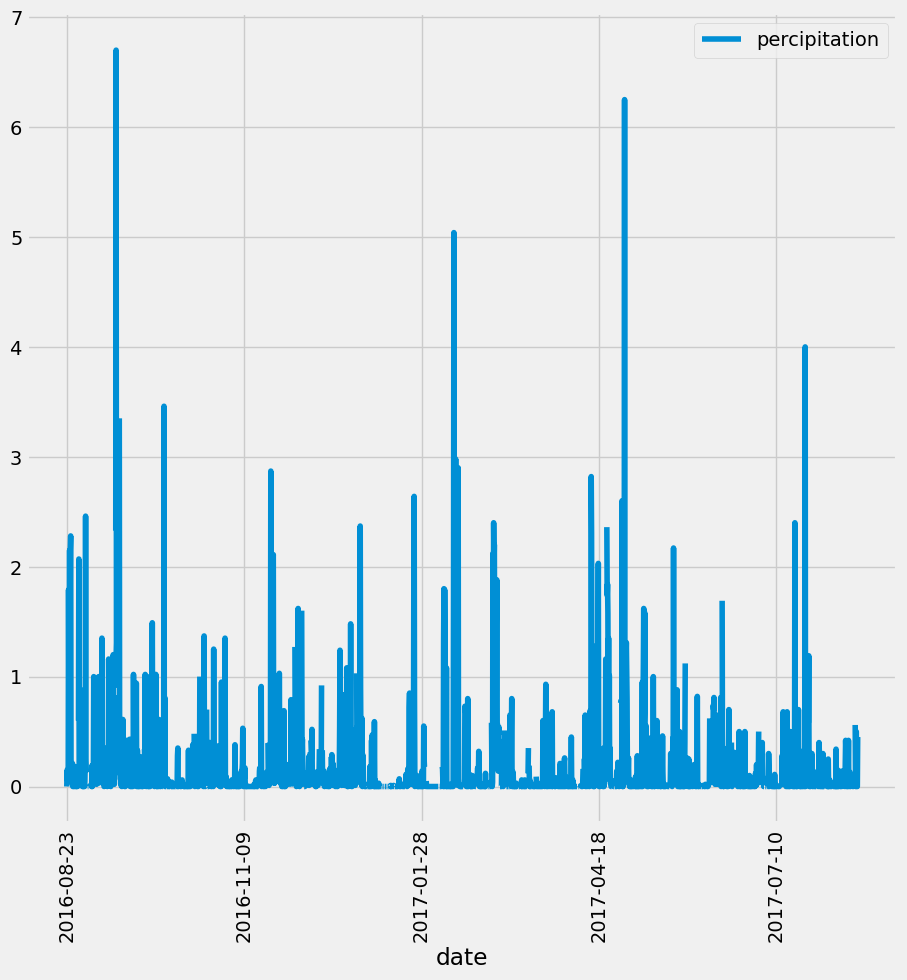

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
sel = [measurement.station,
       measurement.date,
       measurement.prcp]
last_year = session.query(*sel).\
    filter(measurement.date <= dt.date(2017,8,23)).\
    filter(measurement.date >= year_ago).\
    order_by(measurement.date).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
percipitation_df = pd.DataFrame(last_year, columns=['station','date','percipitation'])

# Sort the dataframe by date
percipitation_df.sort_values('date',inplace=True)
percipitation_df.set_index('date',inplace=True)
# Use Pandas Plotting with Matplotlib to plot the data
percipitation_df
percipitation_df.plot(figsize=(10,10), rot=90)




In [12]:
percipitation_df

,station,percipitation
date,,
2016-08-23,USC00519397,0.00
2016-08-23,USC00513117,0.15
2016-08-23,USC00514830,0.05
2016-08-23,USC00517948,NaN
2016-08-23,USC00519523,0.02
...,...,...
2017-08-22,USC00516128,0.50
2017-08-23,USC00519523,0.08
2017-08-23,USC00519397,0.00


In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
percipitation_df.describe()

,percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(measurement.station).distinct().count()
station_count

9

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#most_active_temp = session.query(measurement).filter(measurement.station == 'USC00519281').filter(func.max(measurement.tobs)).filter(func.min(measurement.tobs)).filter(func.avg(measurement.tobs))
most_active_temp = session.query(func.max(measurement.tobs),\
    func.min(measurement.tobs),\
    func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
most_active_temp


[(85.0, 54.0, 71.66378066378067)]

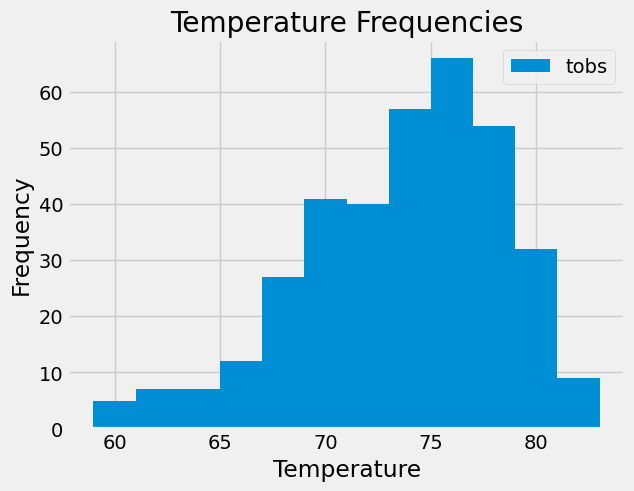

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_recent_active = session.query(measurement.date).filter(measurement.station == 'USC00519281').order_by(measurement.date.desc()).first()

sel = [measurement.station,
       measurement.date,
       measurement.tobs]
last_year_active = session.query(*sel).\
    filter(measurement.date <= dt.date(2017, 8, 18)).\
    filter(measurement.date >= year_ago).\
    filter(measurement.station == 'USC00519281').\
    order_by(measurement.date).all()

active_df = pd.DataFrame(last_year_active, columns=['station','date','tobs'])
active_df.set_index('date',inplace=True)

plt.hist(active_df['tobs'],bins =12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(['tobs'])
plt.title("Temperature Frequencies")
plt.show()

# Close Session

In [17]:
# Close Session
session.close()